# Run the simulation (i.e run_tardis)

In [1]:
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data

# the data is automatically downloaded
download_atom_data('kurucz_cd23_chianti_H_He')

#TARDIS now uses the data in the data repo
#start_time = time.time()
sim = run_tardis('/home/jasims/tardis/docs/models/examples/tardis_example.yml')

/home/jasims/miniconda3/envs/tardis/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)


[tardis.io.atom_data.atom_web_download][INFO   ]  Downloading atomic data from https://media.githubusercontent.com/media/tardis-sn/tardis-refdata/master/atom_data/kurucz_cd23_chianti_H_He.h5 to /home/jasims/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (atom_web_download.py:47)


/home/jasims/miniconda3/envs/tardis/lib/python3.6/site-packages/tardis/io/util.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from /home/jasims/tardis/docs/models/examples/kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:74)
[py.warnings         ][WARNING]  /home/jasims/miniconda3/envs/tardis/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:99)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:184)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:187)
[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 7.96915e+42 erg / s Luminosity absorbed = 2.63370e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Plasma stratific

[tardis.simulation.base][INFO   ]  t_inner 10123.177 K -- next t_inner 11180.783 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 10/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.28170e+43 erg / s Luminosity absorbed = 4.19511e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      10666.223660  11427.410445  0.445097  0.500788
	5      11000.288585  11612.349822  0.163424  0.193129
	10     10822.884326  11373.245169  0.101641  0.121622
	15     10384.181273  11047.955461  0.078432  0.090937

 (base.py:350)
[tardis.simulation.base][INFO   ]  t_inner 11180.783 K -- next t_inner 10164.432 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 11/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 8.79074e+42 erg / s Lum

[tardis.simulation.base][INFO   ]  t_inner 10314.623 K -- next t_inner 11009.102 K (base.py:352)
[tardis.simulation.base][INFO   ]  Starting iteration 20/20 (base.py:268)
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.21062e+43 erg / s Luminosity absorbed = 3.88405e+42 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:359)
[tardis.simulation.base][INFO   ]  Simulation finished in 20 iterations and took 203.96 s (base.py:308)


# Simple plotting using bqplot

In [2]:
from bqplot import LinearScale, Axis, Lines
from bqplot import pyplot as plt

x_sc = LinearScale()
y_sc = LinearScale()


x_data = sim.runner.spectrum.wavelength
y_data = sim.runner.spectrum.luminosity_density_lambda

line_chart1 = Lines(x=x_data, y=y_data, scales= {'x': x_sc, 'y': y_sc}, 
                        display_legend=True, labels=["Normal Packets"],colors=['Coral'] )

ax_x = Axis(scale=x_sc , label='Wavelength [$\AA$]')
ax_y = Axis(scale=y_sc, label='Luminosity [erg/s/$\AA$]',orientation='vertical')

plt.figure(marks=[line_chart1], axes=[ax_x, ax_y],background_style={'fill':'lightyellow'})
plt.show()        

[py.warnings         ][WARNING]  /home/jasims/miniconda3/envs/tardis/lib/python3.6/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))
 (warnings.py:99)


# Import the Library required for Interaction 

In [3]:
from ipywidgets import widgets
from ipywidgets import Button
from ipywidgets import Layout
from ipywidgets import *
from IPython.display import clear_output

# There are three button and will tell the function of each widget :-
1 - Plot <br>
that will plot the line plot using bqplot

2 - Model_Paramters <br>
will give a bried about the model parameters

3 - Temp vs shell plot <br>
will plot Rad Temperature Vs Shell plot

In [4]:
def on_button_clicked(b):
    print("Temp_vs_Shell")
    from Sim import plot_w
    plot_w(sim)
    clear_output(wait=True)
        
def on_button_clicked_plot(b):
    from Sim import line_Plot_show
    print("Simple Plot")
    line_Plot_show(sim)
    clear_output(wait=True)
        
def on_button_clicked_para(b):
    from Sim import model_parameters
    print('Model Parameters')
    model_parameters(sim)
    clear_output(wait=True)


plot  = Button(description='PLOT',
                 layout=Layout(width='auto', grid_area='header1'),
                 style=ButtonStyle(button_color='chartreuse'))
plot.on_click(on_button_clicked_plot)

parameters    = Button(description='MODEL PARAMETERS',
                 layout=Layout(width='auto', grid_area='main'),
                 style=ButtonStyle(button_color='moccasin'))
parameters.on_click(on_button_clicked_para)

Temp_vs_Shell  = Button(description='Temp VS Shell Plot',
                 layout=Layout(width='auto', grid_area='footer2'),
                 style=ButtonStyle(button_color='Aqua'))
Temp_vs_Shell.on_click(on_button_clicked)


GridBox(children=[plot,parameters,Temp_vs_Shell],
        layout=Layout(
            width='80%',
            grid_template_rows='auto auto auto',
            grid_template_columns='25% 25%',
            grid_template_areas='''
            "header1 header1"
            "main main"
            "footer2 footer2"
            ''')
       )

GridBox(children=(Button(description='PLOT', layout=Layout(grid_area='header1', width='auto'), style=ButtonSty…

Temp_vs_Shell


# For interactivity i have used brush selector from bqlot so user can select the range and get the values.
The function will provide a widget but user have to pass sim(model) and it will be ready to play with the graph

In [5]:
from Sim import line_Plot
line_Plot(sim)

# 6 more widgets :-
4 widget are regarding fetching data and show that in form of table <br>
(i.e information about individual iterations) <br>

2 widget are for heatmap<br>
(i.e heatmap for radiation temperature in each cell & electron density in each cell)

In [6]:
def on_button_clicked_electron_density(b):
    from Sim import table_data2
    table_data2(sim)
               
def on_button_clicked_dilution_factor(b):
    from Sim import table_data
    table_data(sim)
    
        
def on_button_clicked_inner_boundary_tem(b):
    from Sim import table_data3
    table_data3(sim)
    

def on_button_clicked_heat_R(b):
    from Sim import heat_plot_rad
    heat_plot_rad(sim)
    #clear_output(wait=True)

def on_button_clicked_heat_E(b):
    from Sim import heat_plot_elec
    heat_plot_elec(sim)
    #clear_output(wait=True)

def on_button_clicked_radiation_temperature(b):
    from Sim import table_data1
    table_data1(sim)
    #clear_output(wait=True)
    
    
    
dilution_factor  = Button(description='Dilution_factor Data',
                 layout=Layout(width='auto', grid_area='header1'),
                 style=ButtonStyle(button_color='chartreuse'))
dilution_factor.on_click(on_button_clicked_dilution_factor)

inner_boundary_tem = Button(description='Inner_Boundary_Tem',
                 layout=Layout(width='auto', grid_area='header2'),
                 style=ButtonStyle(button_color='moccasin'))
inner_boundary_tem.on_click(on_button_clicked_inner_boundary_tem)

electron_density  = Button(description='Electron_Density Data',
                 layout=Layout(width='auto', grid_area='main'),
                 style=ButtonStyle(button_color='Aqua'))

electron_density.on_click(on_button_clicked_electron_density)

radiation_temperature = Button(description='Radiation_Temperature Data',
                 layout=Layout(width='auto', grid_area='sidebar'),
                 style=ButtonStyle(button_color='Plum'))
radiation_temperature.on_click(on_button_clicked_radiation_temperature)

heat_R_plot  = Button(description='Heat_Map of Radiation temperature',
                 layout=Layout(width='auto', grid_area='footer1'),
                 style=ButtonStyle(button_color='Yellow'))
heat_R_plot.on_click(on_button_clicked_heat_R)

heat_E_plot  = Button(description='Heat Map of Electron Density',
                 layout=Layout(width='auto', grid_area='footer2'),
                 style=ButtonStyle(button_color='Coral'))
heat_E_plot.on_click(on_button_clicked_heat_E)


GridBox(children=[dilution_factor,inner_boundary_tem,electron_density,radiation_temperature,heat_R_plot,heat_E_plot],
        layout=Layout(
            width='50%',
            grid_template_rows='auto auto auto',
            grid_template_columns='25% 25% 25% 25%',
            grid_template_areas='''
            "header1 header1 header2 header2"
            "main main sidebar sidebar"
            "footer1 footer1 footer2 footer2"
            ''')
       )


GridBox(children=(Button(description='Dilution_factor Data', layout=Layout(grid_area='header1', width='auto'),…

'Electron Density In Each Cell'

Elec_Dens_0   Elec_Dens_1   Elec_Dens_2   Elec_Dens_3   Elec_Dens_4  \
0   2.865134e+09  2.182365e+09  1.678840e+09  1.303472e+09  1.020811e+09   
1   2.887151e+09  2.197843e+09  1.691263e+09  1.312902e+09  1.028480e+09   
2   2.950471e+09  2.244830e+09  1.727010e+09  1.340815e+09  1.050278e+09   
3   2.905771e+09  2.217178e+09  1.705853e+09  1.323979e+09  1.036699e+09   
4   2.950890e+09  2.250289e+09  1.730036e+09  1.346391e+09  1.057956e+09   
5   2.912816e+09  2.223268e+09  1.710773e+09  1.327122e+09  1.039466e+09   
6   2.949930e+09  2.249180e+09  1.731951e+09  1.345306e+09  1.054527e+09   
7   2.913690e+09  2.221608e+09  1.710776e+09  1.328373e+09  1.039584e+09   
8   2.947654e+09  2.247122e+09  1.729877e+09  1.346768e+09  1.056465e+09   
9   2.913111e+09  2.220288e+09  1.710359e+09  1.327830e+09  1.039474e+09   
10  2.946144e+09  2.245561e+09  1.730048e+09  1.343563e+09  1.050927e+09   
11  2.916332e+09  2.225543e+09  1.712485e+09  1.329138e+09  1.042300e+09   
12  2.949951e+09  2.248608e+09  1.733049e+09  1.349323e+09  1.061308e+09   
13  2.915729e+09  2.222750e+09  1.709809e+09  1.330086e+09  1.041815e+09   
14  2.945511e+09  2.244108e+09  1.729085e+09  1.345862e+09  1.053533e+09   
15  2.915105e+09  2.221144e+09  1.708760e+09  1.329729e+09  1.041016e+09   
16  2.942732e+09  2.242195e+09  1.724849e+09  1.342082e+09  1.052130e+09   
17  2.916224e+09  2.225329e+09  1.713487e+09  1.330835e+09  1.042713e+09   
18  2.941154e+09  2.243259e+09  1.727766e+09  1.344461e+09  1.053207e+09   
19  2.921503e+09  2.227664e+09  1.716046e+09  1.332692e+09  1.042754e+09   

     Elec_Dens_5   Elec_Dens_6   Elec_Dens_7   Elec_Dens_8   Elec_Dens_9  \
0   8.059447e+08  6.411609e+08  5.137297e+08  4.144079e+08  3.364195e+08   
1   8.118978e+08  6.458923e+08  5.172780e+08  4.173210e+08  3.386495e+08   
2   8.305797e+08  6.620027e+08  5.309799e+08  4.279647e+08  3.480646e+08   
3   8.186977e+08  6.510360e+08  5.214115e+08  4.201861e+08  3.407720e+08   
4   8.360390e+08  6.660850e+08  5.333447e+08  4.305829e+08  3.485320e+08   
5   8.207880e+08  6.527492e+08  5.223164e+08  4.214344e+08  3.417276e+08   
6   8.332298e+08  6.640786e+08  5.347414e+08  4.321177e+08  3.503694e+08   
7   8.209177e+08  6.532310e+08  5.232645e+08  4.215930e+08  3.420746e+08   
8   8.352892e+08  6.658224e+08  5.341091e+08  4.305795e+08  3.486520e+08   
9   8.203042e+08  6.521561e+08  5.222567e+08  4.211646e+08  3.418095e+08   
10  8.324463e+08  6.641383e+08  5.320339e+08  4.302645e+08  3.478368e+08   
11  8.235076e+08  6.550248e+08  5.243245e+08  4.228429e+08  3.426877e+08   
12  8.409437e+08  6.694836e+08  5.369094e+08  4.333126e+08  3.527474e+08   
13  8.226120e+08  6.542962e+08  5.245068e+08  4.229403e+08  3.428963e+08   
14  8.356548e+08  6.654925e+08  5.325924e+08  4.303105e+08  3.489102e+08   
15  8.219581e+08  6.533227e+08  5.231107e+08  4.216089e+08  3.420558e+08   
16  8.336102e+08  6.643351e+08  5.307281e+08  4.273592e+08  3.465006e+08   
17  8.231907e+08  6.542620e+08  5.239037e+08  4.215572e+08  3.421512e+08   
18  8.319974e+08  6.620074e+08  5.320843e+08  4.287991e+08  3.470757e+08   
19  8.229495e+08  6.555291e+08  5.256444e+08  4.234505e+08  3.437682e+08   

    Elec_Dens_10  Elec_Dens_11  Elec_Dens_12  Elec_Dens_13  Elec_Dens_14  \
0   2.747519e+08  2.256656e+08  1.863476e+08  1.546660e+08  1.289928e+08   
1   2.763514e+08  2.268498e+08  1.872357e+08  1.553629e+08  1.294493e+08   
2   2.840061e+08  2.331070e+08  1.920780e+08  1.592285e+08  1.325329e+08   
3   2.779420e+08  2.283003e+08  1.884562e+08  1.562919e+08  1.302062e+08   
4   2.852337e+08  2.338546e+08  1.923931e+08  1.594048e+08  1.329583e+08   
5   2.789362e+08  2.289206e+08  1.889806e+08  1.566967e+08  1.306730e+08   
6   2.847647e+08  2.329000e+08  1.919332e+08  1.590595e+08  1.326532e+08   
7   2.791028e+08  2.292671e+08  1.892032e+08  1.568989e+08  1.307211e+08   
8   2.851878e+08  2.342149e+08  1.936721e+08  1.602150e+08  1.332184e+08   
9   2.790890e+08  2.290619e+08  1.889316e+08  1.566

# Working to integrate hover tool and reload button than will replot after the previous plot in the same area.
# I would recommand to open this in Jupyter lab to get better Vizual Results


# Gif for Tardis to how to use it

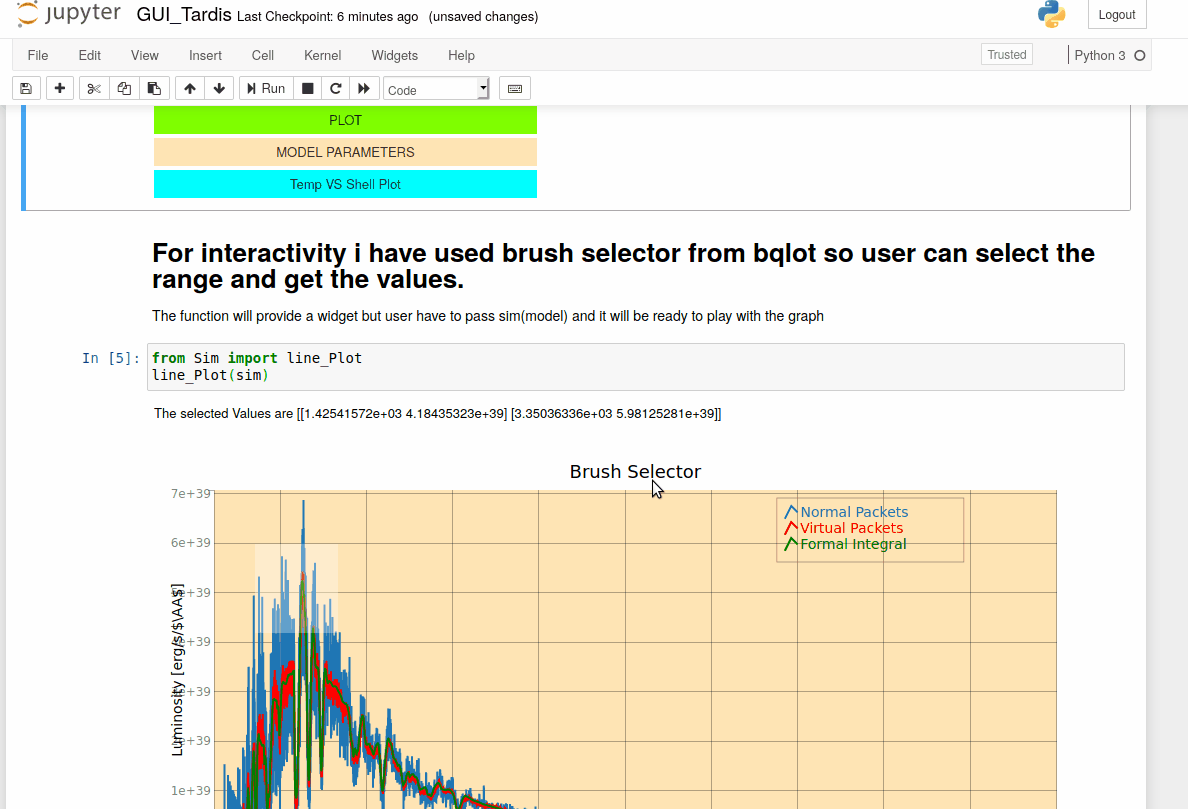

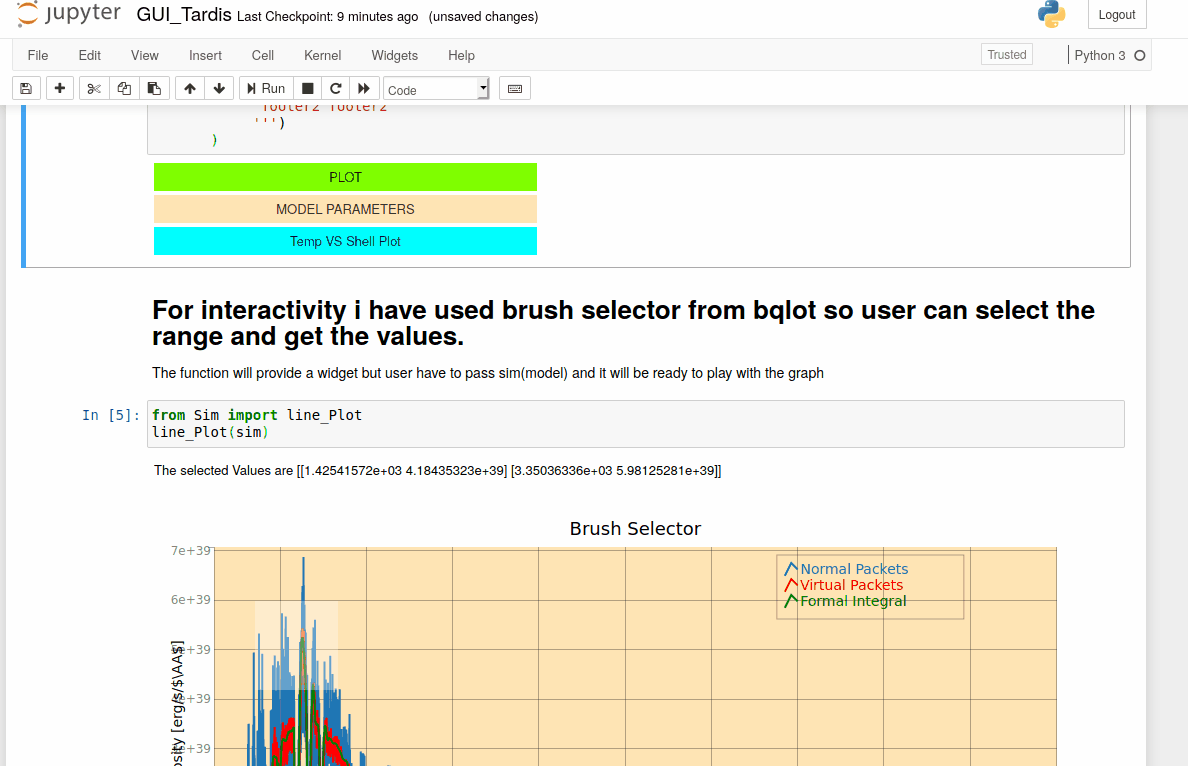

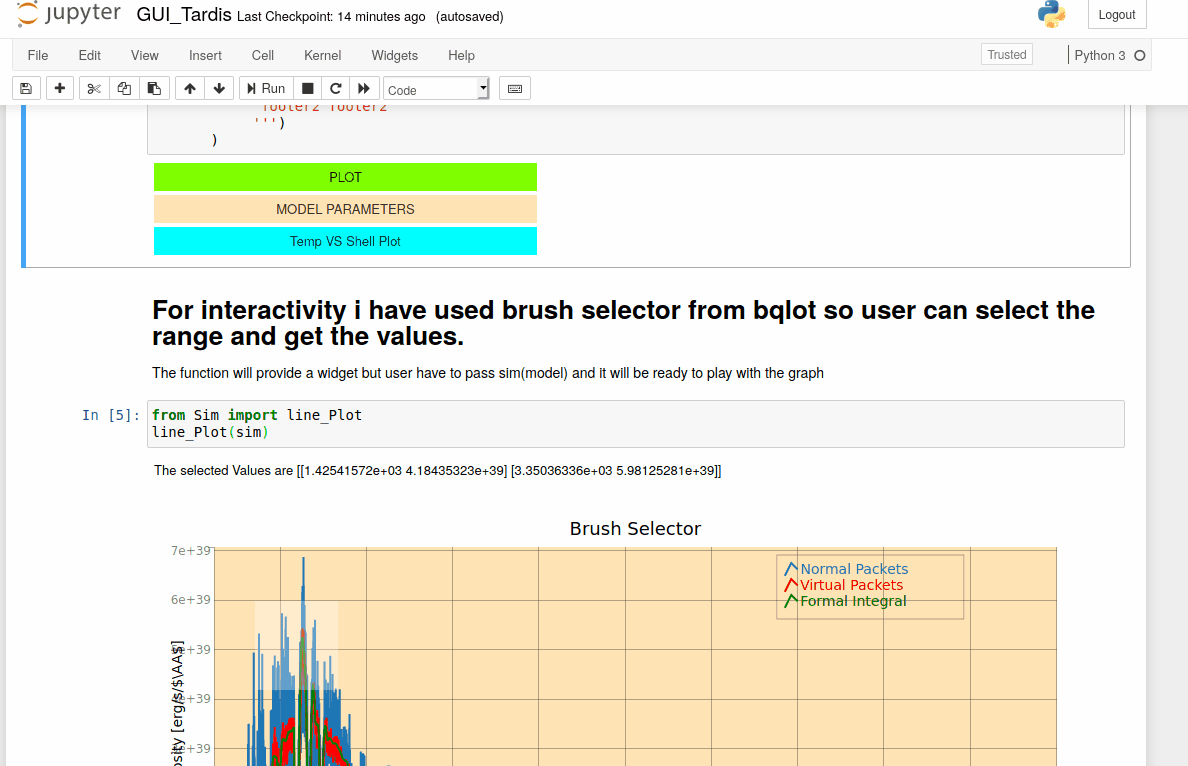

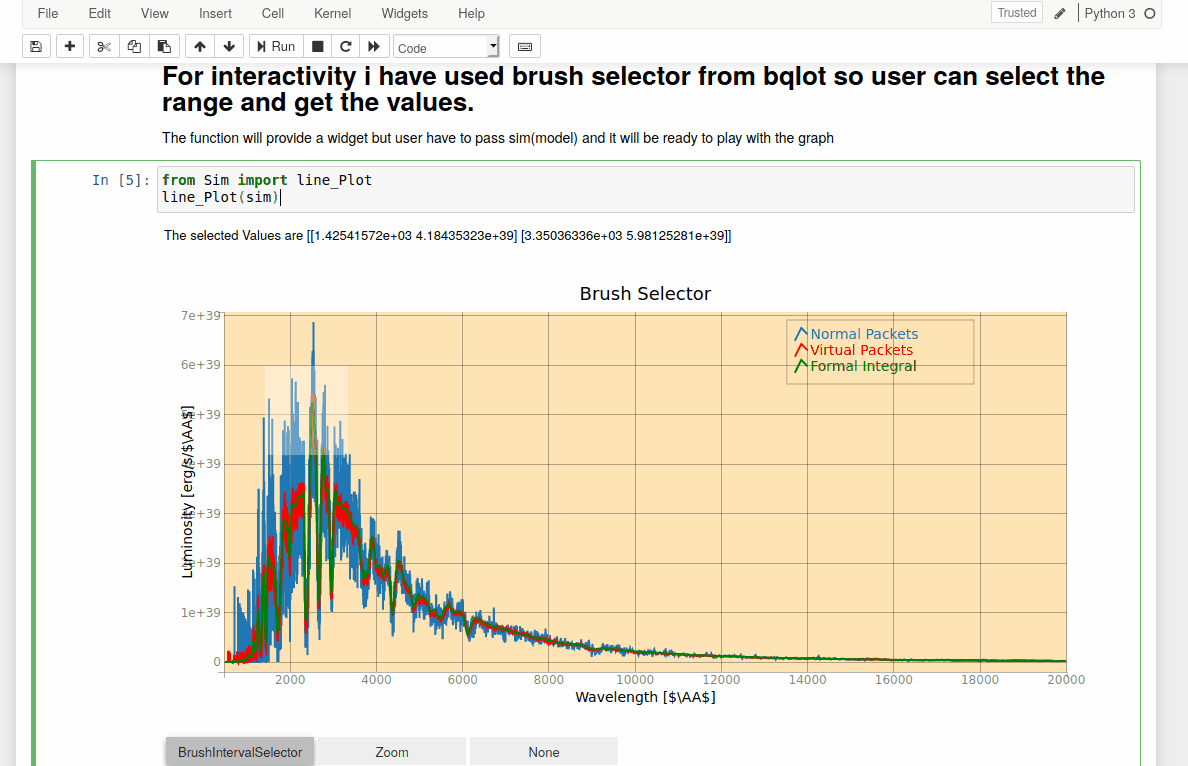

# Hoping for warm feedback